In [1]:
# Load the packages

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
LaLiga2324 = pd.read_csv('LaLiga.csv')
LaLiga2324.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,11/08/2023,18:30,Almeria,Vallecano,0,2,A,0,2,...,1.64,0.00,1.85,2.08,1.86,2.07,1.91,2.09,1.86,2.01
1,SP1,11/08/2023,21:00,Sevilla,Valencia,1,2,A,0,0,...,1.61,-0.50,1.94,1.99,1.94,1.98,1.96,2.00,1.93,1.94
2,SP1,12/08/2023,16:00,Sociedad,Girona,1,1,D,1,0,...,1.72,-0.75,2.05,1.75,2.10,1.82,2.14,1.90,2.04,1.82
3,SP1,12/08/2023,18:30,Las Palmas,Mallorca,1,1,D,1,0,...,1.40,-0.25,2.18,1.77,2.20,1.77,2.21,1.79,2.15,1.75
4,SP1,12/08/2023,20:30,Ath Bilbao,Real Madrid,0,2,A,0,2,...,1.89,0.25,1.99,1.94,1.99,1.93,2.10,1.96,1.95,1.90


In [3]:
LaLiga2324.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=105)

In [4]:
LaLiga2324 = LaLiga2324[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
LaLiga2324.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,11/08/2023,Almeria,Vallecano,0,2,A
1,11/08/2023,Sevilla,Valencia,1,2,A
2,12/08/2023,Sociedad,Girona,1,1,D
3,12/08/2023,Las Palmas,Mallorca,1,1,D
4,12/08/2023,Ath Bilbao,Real Madrid,0,2,A


In [5]:
LaLiga2324.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      239 non-null    object
 1   HomeTeam  239 non-null    object
 2   AwayTeam  239 non-null    object
 3   FTHG      239 non-null    int64 
 4   FTAG      239 non-null    int64 
 5   FTR       239 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.3+ KB


In [6]:
# date to datetime
LaLiga2324['Date'] = pd.to_datetime(LaLiga2324['Date'], format='%d/%m/%Y')
LaLiga2324.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      239 non-null    datetime64[ns]
 1   HomeTeam  239 non-null    object        
 2   AwayTeam  239 non-null    object        
 3   FTHG      239 non-null    int64         
 4   FTAG      239 non-null    int64         
 5   FTR       239 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 11.3+ KB


In [7]:
# remove rows after 2024-02-05 (whSen second half of the season starts)
LaLiga2324 = LaLiga2324[LaLiga2324['Date'] <= '2024-01-04']
LaLiga2324

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,2023-08-11,Almeria,Vallecano,0,2,A
1,2023-08-11,Sevilla,Valencia,1,2,A
2,2023-08-12,Sociedad,Girona,1,1,D
3,2023-08-12,Las Palmas,Mallorca,1,1,D
4,2023-08-12,Ath Bilbao,Real Madrid,0,2,A
...,...,...,...,...,...,...
185,2024-01-03,Real Madrid,Mallorca,1,0,H
186,2024-01-03,Girona,Ath Madrid,4,3,H
187,2024-01-04,Osasuna,Almeria,1,0,H
188,2024-01-04,Sevilla,Ath Bilbao,0,2,A


In [8]:
# check if the dates are correct
LaLiga2324.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
185,2024-01-03,Real Madrid,Mallorca,1,0,H
186,2024-01-03,Girona,Ath Madrid,4,3,H
187,2024-01-04,Osasuna,Almeria,1,0,H
188,2024-01-04,Sevilla,Ath Bilbao,0,2,A
189,2024-01-04,Las Palmas,Barcelona,1,2,A


# Prepare dataset (home and away results to merge at the end)

In [9]:
# keep columns we need
LaLiga2324 = LaLiga2324[['HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
LaLiga2324.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Almeria,Vallecano,0,2,A
1,Sevilla,Valencia,1,2,A
2,Sociedad,Girona,1,1,D
3,Las Palmas,Mallorca,1,1,D
4,Ath Bilbao,Real Madrid,0,2,A


In [10]:
# create hwin column for home wins
LaLiga2324['Points_Hwin'] = LaLiga2324['FTR'].apply(lambda x: 3 if x == 'H' else 0)
# create awin column for away wins
LaLiga2324['Points_Awin'] = LaLiga2324['FTR'].apply(lambda x: 3 if x == 'A' else 0)
# create draw column for draws
LaLiga2324['Points_Draw'] = LaLiga2324['FTR'].apply(lambda x: 1 if x == 'D' else 0)


In [11]:
LaLiga2324

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Points_Hwin,Points_Awin,Points_Draw
0,Almeria,Vallecano,0,2,A,0,3,0
1,Sevilla,Valencia,1,2,A,0,3,0
2,Sociedad,Girona,1,1,D,0,0,1
3,Las Palmas,Mallorca,1,1,D,0,0,1
4,Ath Bilbao,Real Madrid,0,2,A,0,3,0
...,...,...,...,...,...,...,...,...
185,Real Madrid,Mallorca,1,0,H,3,0,0
186,Girona,Ath Madrid,4,3,H,3,0,0
187,Osasuna,Almeria,1,0,H,3,0,0
188,Sevilla,Ath Bilbao,0,2,A,0,3,0


In [12]:
# create a new dataframe with the home teams and the points they got
LaLigaHome = LaLiga2324.groupby('HomeTeam').agg({'Points_Hwin':'sum','FTHG':'sum','FTAG':'sum','Points_Draw':'sum'}).reset_index()
LaLigaHome['Home_Points'] = LaLigaHome['Points_Hwin'] + LaLigaHome['Points_Draw']
LaLigaHome = LaLigaHome.rename(columns={'HomeTeam':'Team'})
LaLigaHome['Home_Goals_diff'] = LaLigaHome['FTHG'] - LaLigaHome['FTAG']
LaLigaHome

,Team,Points_Hwin,FTHG,FTAG,Points_Draw,Home_Points,Home_Goals_diff
0,Alaves,12,10,11,1,13,-1
1,Almeria,0,10,18,4,4,-8
2,Ath Bilbao,21,25,11,2,23,14
3,Ath Madrid,27,23,11,1,28,12
4,Barcelona,24,21,11,0,24,10
5,Betis,15,12,4,4,19,8
6,Cadiz,6,8,9,5,11,-1
7,Celta,6,8,13,4,10,-5
8,Getafe,15,9,6,3,18,3
9,Girona,24,25,13,1,25,12


In [13]:
# create a new dataframe with the home teams and the points they got
LaLigaAway = LaLiga2324.groupby('AwayTeam').agg({'Points_Awin':'sum','FTHG':'sum','FTAG':'sum','Points_Draw':'sum'}).reset_index()
LaLigaAway['Away_points'] = LaLigaAway['Points_Awin'] + LaLigaAway['Points_Draw']
LaLigaAway = LaLigaAway.rename(columns={'AwayTeam':'Team'})
LaLigaAway['Away_Goals_diff'] = LaLigaAway['FTAG'] - LaLigaAway['FTHG']
LaLigaAway

,Team,Points_Awin,FTHG,FTAG,Points_Draw,Away_points,Away_Goals_diff
0,Alaves,0,14,5,4,4,-9
1,Almeria,0,25,9,1,1,-16
2,Ath Bilbao,12,8,11,3,15,3
3,Ath Madrid,9,12,16,1,10,4
4,Barcelona,12,11,15,5,17,4
5,Betis,3,16,9,6,9,-7
6,Cadiz,0,17,6,4,4,-11
7,Celta,3,16,12,3,6,-4
8,Getafe,3,19,15,5,8,-4
9,Girona,21,11,21,2,23,10


In [14]:
# merge home and away on team
LaLigaFirstRound = pd.merge(LaLigaHome, LaLigaAway, on='Team')
LaLigaFirstRound.loc[:, 'Games'] = 19
LaLigaFirstRound

,Team,Points_Hwin,FTHG_x,FTAG_x,Points_Draw_x,Home_Points,Home_Goals_diff,Points_Awin,FTHG_y,FTAG_y,Points_Draw_y,Away_points,Away_Goals_diff,Games
0,Alaves,12,10,11,1,13,-1,0,14,5,4,4,-9,19
1,Almeria,0,10,18,4,4,-8,0,25,9,1,1,-16,19
2,Ath Bilbao,21,25,11,2,23,14,12,8,11,3,15,3,19
3,Ath Madrid,27,23,11,1,28,12,9,12,16,1,10,4,19
4,Barcelona,24,21,11,0,24,10,12,11,15,5,17,4,19
5,Betis,15,12,4,4,19,8,3,16,9,6,9,-7,19
6,Cadiz,6,8,9,5,11,-1,0,17,6,4,4,-11,19
7,Celta,6,8,13,4,10,-5,3,16,12,3,6,-4,19
8,Getafe,15,9,6,3,18,3,3,19,15,5,8,-4,19
9,Girona,24,25,13,1,25,12,21,11,21,2,23,10,19


In [15]:
# Sums stats 
LaLigaFirstRound['Points'] = LaLigaFirstRound['Home_Points'] + LaLigaFirstRound['Away_points']
LaLigaFirstRound['Goals_for'] = LaLigaFirstRound['FTHG_x'] + LaLigaFirstRound['FTAG_y']
LaLigaFirstRound['Goals_against'] = LaLigaFirstRound['FTAG_x'] + LaLigaFirstRound['FTHG_y']
LaLigaFirstRound['Goals_Diff'] = LaLigaFirstRound['Goals_for'] - LaLigaFirstRound['Goals_against']
LaLigaFirstRound['Wins'] = (LaLigaFirstRound['Points_Hwin'] + LaLigaFirstRound['Points_Awin'])/3

LaLigaFirstRound['Draws'] = LaLigaFirstRound['Points_Draw_x'] + LaLigaFirstRound['Points_Draw_y']

LaLigaFirstRound['Lost'] = LaLigaFirstRound['Games'] - LaLigaFirstRound['Wins'] - LaLigaFirstRound['Draws']
LaLigaFirstRound = LaLigaFirstRound[['Team','Points','Wins','Draws','Lost','Goals_for','Goals_against','Goals_Diff','Games']]
LaLigaFirstRound

,Team,Points,Wins,Draws,Lost,Goals_for,Goals_against,Goals_Diff,Games
0,Alaves,17,4.0,5,10.0,15,25,-10,19
1,Almeria,5,0.0,5,14.0,19,43,-24,19
2,Ath Bilbao,38,11.0,5,3.0,36,19,17,19
3,Ath Madrid,38,12.0,2,5.0,39,23,16,19
4,Barcelona,41,12.0,5,2.0,36,22,14,19
5,Betis,28,6.0,10,3.0,21,20,1,19
6,Cadiz,15,2.0,9,8.0,14,26,-12,19
7,Celta,16,3.0,7,9.0,20,29,-9,19
8,Getafe,26,6.0,8,5.0,24,25,-1,19
9,Girona,48,15.0,3,1.0,46,24,22,19


In [16]:
# rename teams
LaLigaFirstRound['Team'] = LaLigaFirstRound['Team'].replace({'Alaves':'Deportivo Alavés','Almeria':'UD Almería','Ath Madrid':'Atl Madrid','Barcelona':'FC Barcelona','Betis':'Real Betis','Cadiz':'Cádiz',
'Celta':'RC Celta','Getafe':'Getafe CF','Las Palmas':'UD Las Palmas','Mallorca':'RCD Mallorca','Osasuna':'CA Osasuna','Sevilla':'Sevilla FC','Sociedad':'Real Sociedad',
'Valencia':'Valencia CF','Vallecano':'Rayo Vallecano','Villarreal':'Villarreal CF','Girona':'Girona FC','Cadiz':'Cádiz CF','Granada':'Granada CF'})

C:\Users\imjos\AppData\Local\Temp\ipykernel_17384\1893640316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LaLigaFirstRound['Team'] = LaLigaFirstRound['Team'].replace({'Alaves':'Deportivo Alavés','Almeria':'UD Almería','Ath Madrid':'Atl Madrid','Barcelona':'FC Barcelona','Betis':'Real Betis','Cadiz':'Cádiz',


In [17]:
LaLigaFirstRound

,Team,Points,Wins,Draws,Lost,Goals_for,Goals_against,Goals_Diff,Games
0,Deportivo Alavés,17,4.0,5,10.0,15,25,-10,19
1,UD Almería,5,0.0,5,14.0,19,43,-24,19
2,Ath Bilbao,38,11.0,5,3.0,36,19,17,19
3,Atl Madrid,38,12.0,2,5.0,39,23,16,19
4,FC Barcelona,41,12.0,5,2.0,36,22,14,19
5,Real Betis,28,6.0,10,3.0,21,20,1,19
6,Cádiz CF,15,2.0,9,8.0,14,26,-12,19
7,RC Celta,16,3.0,7,9.0,20,29,-9,19
8,Getafe CF,26,6.0,8,5.0,24,25,-1,19
9,Girona FC,48,15.0,3,1.0,46,24,22,19


In [18]:
# sort by points and goals_diff
LaLigaFirstRound = LaLigaFirstRound.sort_values(by=['Points','Goals_Diff'], ascending=False)
LaLigaFirstRound

,Team,Points,Wins,Draws,Lost,Goals_for,Goals_against,Goals_Diff,Games
14,Real Madrid,48,15.0,3,1.0,40,11,29,19
9,Girona FC,48,15.0,3,1.0,46,24,22,19
4,FC Barcelona,41,12.0,5,2.0,36,22,14,19
2,Ath Bilbao,38,11.0,5,3.0,36,19,17,19
3,Atl Madrid,38,12.0,2,5.0,39,23,16,19
16,Real Sociedad,32,8.0,8,3.0,30,19,11,19
5,Real Betis,28,6.0,10,3.0,21,20,1,19
8,Getafe CF,26,6.0,8,5.0,24,25,-1,19
17,Valencia CF,26,7.0,5,7.0,22,23,-1,19
11,UD Las Palmas,25,7.0,4,8.0,16,17,-1,19


# Use formulas that take draws in consideration

In [19]:
# points percentage won 
LaLigaFirstRound['Points_percentage'] = LaLigaFirstRound['Points'] / (LaLigaFirstRound['Games'] * 3)

# stastbomb Formula
points_per_game  = (3 * LaLigaFirstRound['Wins'] + LaLigaFirstRound['Draws']) / LaLigaFirstRound['Games']
LaLigaFirstRound['SB_expected_points'] = points_per_game**2 / (points_per_game**2 + (3 - points_per_game)**2)

# Hofmann formula
LaLigaFirstRound['Hof_expected_points'] = (LaLigaFirstRound['Goals_for']**2) / (LaLigaFirstRound['Goals_for']**2 + LaLigaFirstRound['Goals_against']**2 + LaLigaFirstRound['Draws'])


LaLigaFirstRound

,Team,Points,Wins,Draws,Lost,Goals_for,Goals_against,Goals_Diff,Games,Points_percentage,SB_expected_points,Hof_expected_points
14,Real Madrid,48,15.0,3,1.0,40,11,29,19,0.842105,0.966038,0.928074
9,Girona FC,48,15.0,3,1.0,46,24,22,19,0.842105,0.966038,0.785158
4,FC Barcelona,41,12.0,5,2.0,36,22,14,19,0.719298,0.867837,0.726050
2,Ath Bilbao,38,11.0,5,3.0,36,19,17,19,0.666667,0.800000,0.779783
3,Atl Madrid,38,12.0,2,5.0,39,23,16,19,0.666667,0.800000,0.741228
16,Real Sociedad,32,8.0,8,3.0,30,19,11,19,0.561404,0.620982,0.709220
5,Real Betis,28,6.0,10,3.0,21,20,1,19,0.491228,0.482462,0.518214
8,Getafe CF,26,6.0,8,5.0,24,25,-1,19,0.456140,0.412951,0.476427
17,Valencia CF,26,7.0,5,7.0,22,23,-1,19,0.456140,0.412951,0.475442
11,UD Las Palmas,25,7.0,4,8.0,16,17,-1,19,0.438596,0.379018,0.466302


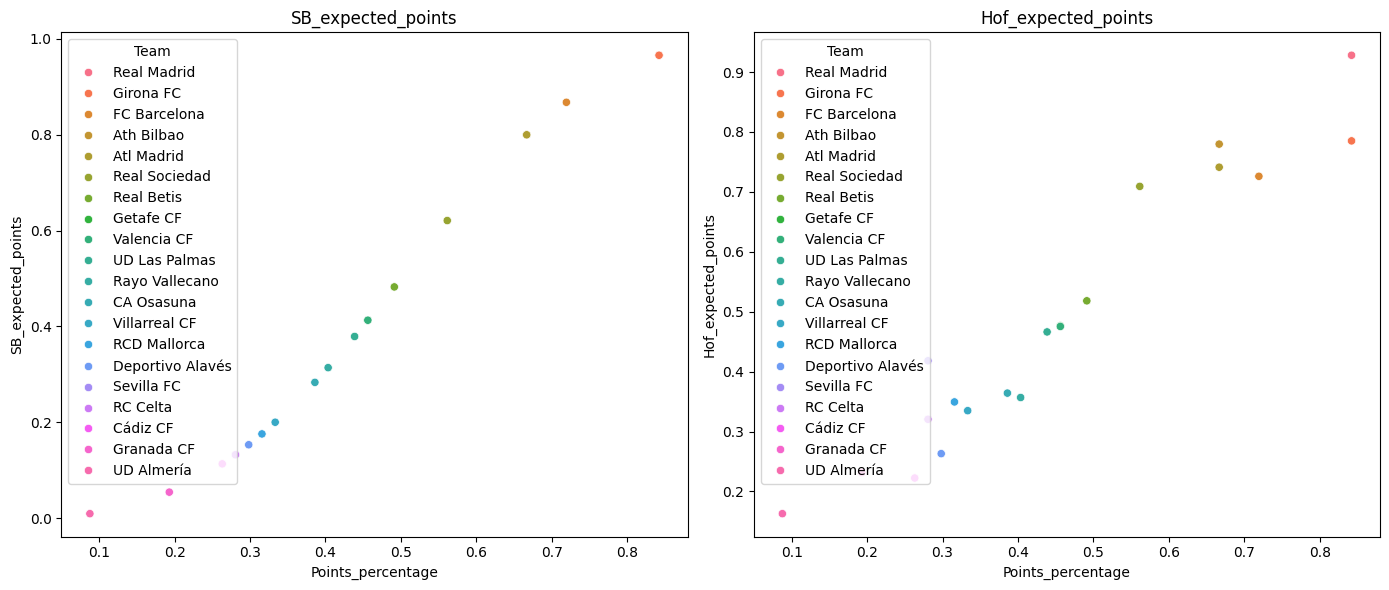

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the necessary data, assuming LaLigaFirstRound is already loaded

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first scatterplot on the first subplot
sns.scatterplot(x="Points_percentage", y="SB_expected_points", data=LaLigaFirstRound, hue='Team', ax=axes[0])

# Plot the second scatterplot on the second subplot
sns.scatterplot(x="Points_percentage", y="Hof_expected_points", data=LaLigaFirstRound, hue='Team', ax=axes[1])

# Set titles for each subplot
axes[0].set_title('SB_expected_points')
axes[1].set_title('Hof_expected_points')

# Remove the extra spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [21]:
# pearson correlation between points_percentage, SB_expected_points and Hof_expected_points
LaLigaFirstRound[['Points','Points_percentage','SB_expected_points','Hof_expected_points']].corr(method='pearson')


,Points,Points_percentage,SB_expected_points,Hof_expected_points
Points,1.000000,1.000000,0.988753,0.964083
Points_percentage,1.000000,1.000000,0.988753,0.964083
SB_expected_points,0.988753,0.988753,1.000000,0.971765
Hof_expected_points,0.964083,0.964083,0.971765,1.000000


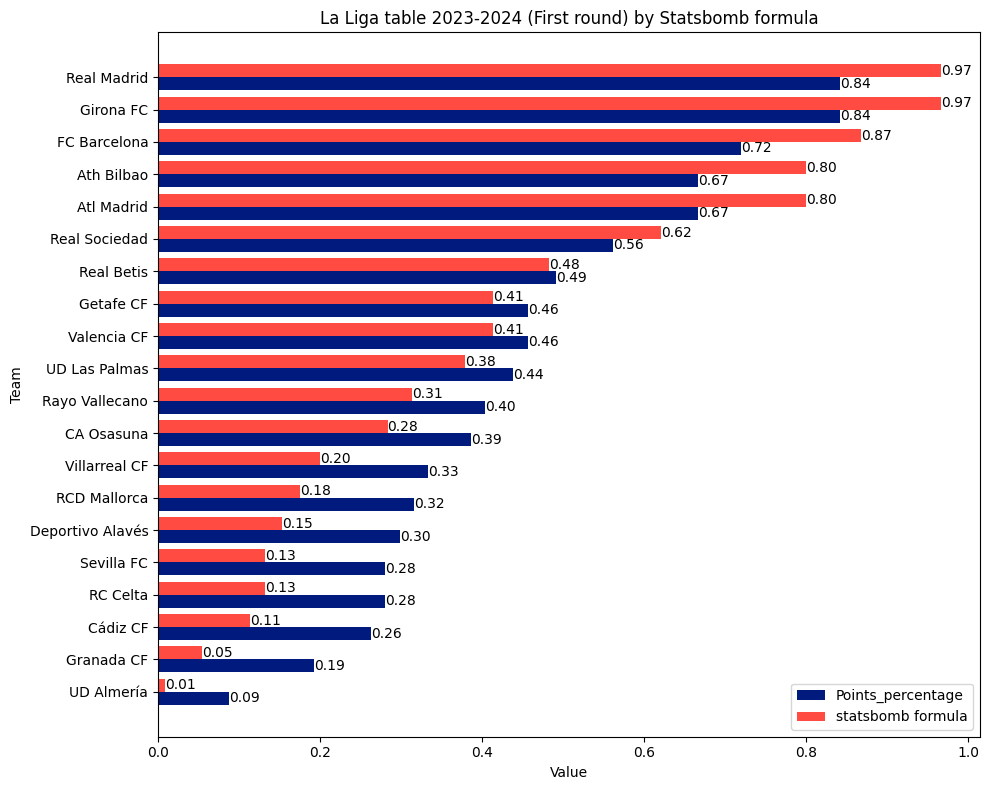

In [34]:
LaLigaFirstRound = LaLigaFirstRound.sort_values(by='SB_expected_points', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
bar_height = 0.40
index = range(len(LaLigaFirstRound))

plt.xlabel('Value')
plt.ylabel('Team')
plt.title('La Liga table 2023-2024 (First round) by Statsbomb formula')

# Annotate bars with values
bars1 = plt.barh(index, LaLigaFirstRound['Points_percentage'], bar_height, label='Points_percentage', color='#001A7D')
bars2 = plt.barh([i + bar_height for i in index], LaLigaFirstRound['SB_expected_points'], bar_height, label='statsbomb formula', color='#ff4b42')

for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 va='center', ha='left')

plt.yticks([i + bar_height / 2 for i in index], LaLigaFirstRound['Team'])
plt.legend()

plt.grid(False) 

plt.tight_layout()
plt.show()


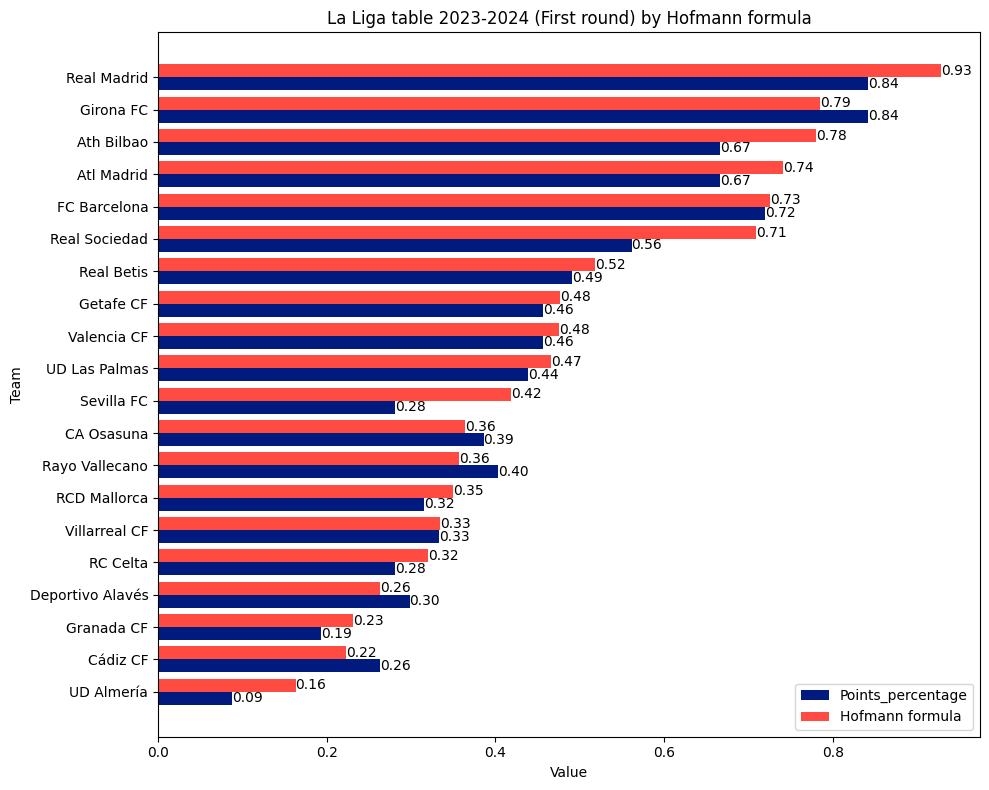

In [31]:
LaLigaFirstRound = LaLigaFirstRound.sort_values(by='Hof_expected_points', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
bar_height = 0.40
index = range(len(LaLigaFirstRound))

plt.xlabel('Value')
plt.ylabel('Team')
plt.title('La Liga table 2023-2024 (First round) by Hofmann formula')

# Annotate bars with values
bars1 = plt.barh(index, LaLigaFirstRound['Points_percentage'], bar_height, label='Points_percentage', color='#001A7D')
bars2 = plt.barh([i + bar_height for i in index], LaLigaFirstRound['Hof_expected_points'], bar_height, label='Hofmann formula', color='#ff4b42')

for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 va='center', ha='left')

plt.yticks([i + bar_height / 2 for i in index], LaLigaFirstRound['Team'])
plt.legend()

plt.grid(False) 

plt.tight_layout()
plt.show()